In [19]:
import folium
import pandas as pd
from sodapy import Socrata
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib

client = Socrata("datacatalog.cookcountyil.gov","geaB2V2Jg28NhvW1DoR4RQdaT")
 
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("xswi-76cy",limit=200000)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)
#map to show gun related death distribution
map_gun = folium.Map(location=[41.73459, -87.7558])
mapit = None
a = -df["location"].isnull()
df_n = df[a]
gun = df_n['gunrelated']==True
df_gun = df_n[gun]
for i in range(len(df_gun)):
    try:
        folium.CircleMarker(location=[float(df_gun['latitude'][i]), float(df_gun['longitude'][i])],radius=1.5,weight=5,color="#ff6347").add_to(map_gun)
    except:
        continue
map_gun
#map_gun.save('map_gun.html')

In [6]:
op = df['opioids']==True
df_op = df[op]
#module to calculate sum over month
def count_month(df):
    df = df[df['death_date'] > '2014-07']
    time_list = []
    count = []
    year_start = datetime.strptime(df['death_date'].min(),'%Y-%m-%dT%H:%M:%S.000').year
    month_start = datetime.strptime(df['death_date'].min(),'%Y-%m-%dT%H:%M:%S.000').month
    year_end = datetime.strptime(df['death_date'].max(),'%Y-%m-%dT%H:%M:%S.000').year
    month_end = datetime.strptime(df['death_date'].max(),'%Y-%m-%dT%H:%M:%S.000').month
    if year_end == year_start:
        for i in range(month_end-month_start):
            t_s = str(year_start) + "-" + "{0:0=2d}".format(month_start+i)
            t_e = str(year_start) + "-" + "{0:0=2d}".format(month_start+i+1)
            time_list.append(datetime.strptime(str(year_start) + "-" + str(month_start+i), '%Y-%m'))
            count.append(sum((df['death_date'] >= t_s) & (df['death_date'] < t_e)))
    elif year_end - year_start == 1:
        for i in range(12-month_start):
            t_s = str(year_start) + "-" + "{0:0=2d}".format(month_start+i)
            t_e = str(year_start) + "-" + "{0:0=2d}".format(month_start+i+1)
            time_list.append(datetime.strptime(str(year_start) + "-" + str(month_start+i), '%Y-%m'))
            count.append(sum((df['death_date'] >= t_s) & (df['death_date'] < t_e)))
        for i in range(month_end):
            t_s = str(year_end) + "-" + "{0:0=2d}".format(1+i)
            t_e = str(year_end) + "-" + "{0:0=2d}".format(2+i)
            time_list.append(datetime.strptime(str(year_end) + "-" + str(i+1), '%Y-%m'))
            count.append(sum((df['death_date'] >= t_s) & (df['death_date'] < t_e)))
    else:
        for i in range(13-month_start):
            t_s = str(year_start) + "-" + "{0:0=2d}".format(month_start+i)
            t_e = str(year_start) + "-" + "{0:0=2d}".format(month_start+i+1)
            time_list.append(datetime.strptime(str(year_start) + "-" + str(month_start+i), '%Y-%m'))
            
            count.append(sum((df['death_date'] >= t_s) & (df['death_date'] < t_e)))
            
        for i in range(year_end - year_start -1):
            for j in range(12):
                t_s = str(year_start+i+1) + "-" + "{0:0=2d}".format(1+j)
                t_e = str(year_start+i+1) + "-" + "{0:0=2d}".format(2+j)
                time_list.append(datetime.strptime(str(year_start+i+1) + "-" + str(j+1), '%Y-%m'))

                count.append(sum((df['death_date'] >= t_s) & (df['death_date'] < t_e)))              

            
        for i in range(month_end):
            t_s = str(year_end) + "-" + "{0:0=2d}".format(1+i)
            t_e = str(year_end) + "-" + "{0:0=2d}".format(2+i)
            time_list.append(datetime.strptime(str(year_end) + "-" + str(i+1), '%Y-%m'))
            count.append(sum((df['death_date'] >= t_s) & (df['death_date'] < t_e)))
    return time_list,count
        

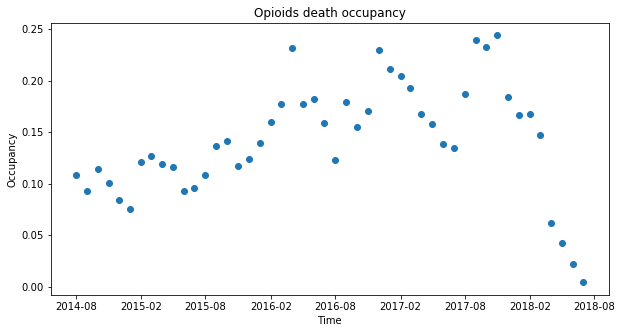

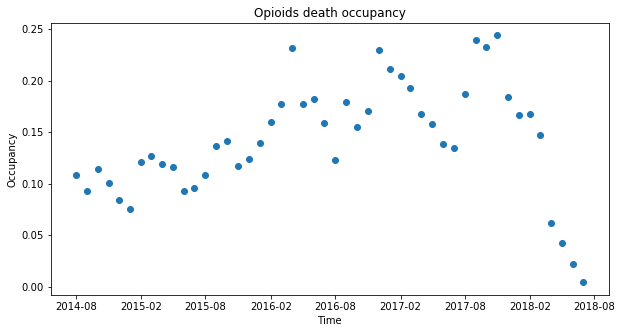

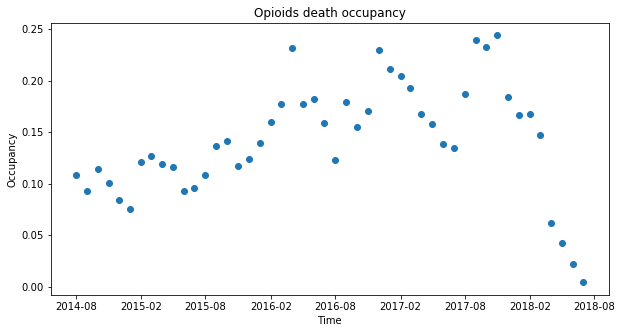

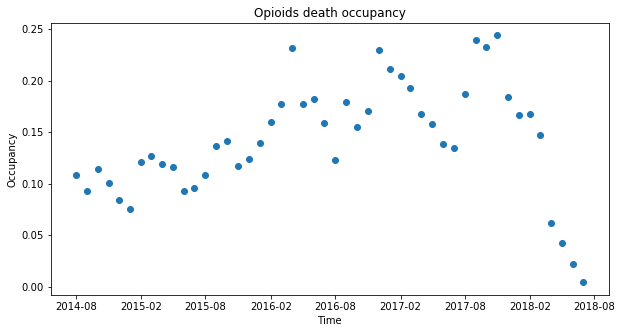

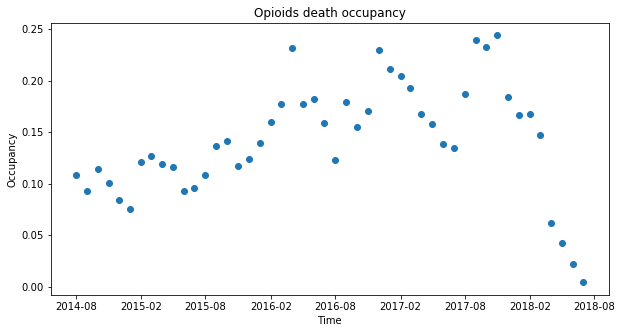

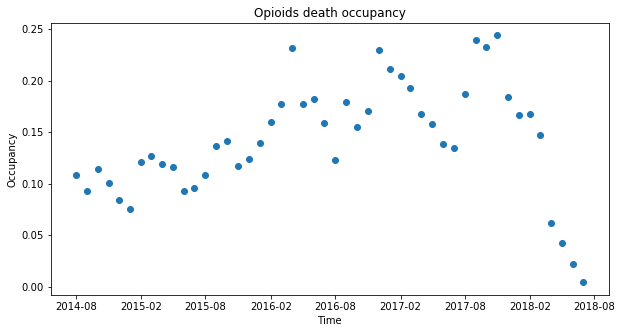

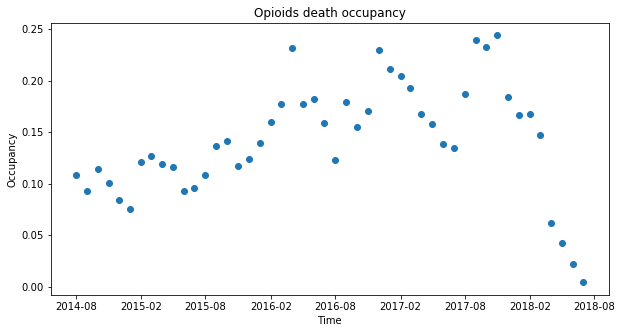

In [17]:
tl,co = count_month(df)
tl1,co1 = count_month(df_op)
c = [x/y for x, y in zip(co1,co)]
dates = matplotlib.dates.date2num(tl)
plt.figure(figsize = (10,5)) 
plt.plot_date(dates, c)
plt.title('Opioids death occupancy')
plt.ylabel('Occupancy')
plt.xlabel('Time')



plt.savefig("E:/data/capstone_1.png",dpi=600)
plt.show()